In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Считывание данных
Считаем полученные данные и для наглядности отобразим некоторые строки из датасета

In [230]:
df = pd.read_csv('data.csv', sep=';')
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


# Описание признаков

## Переменные, характеризующие кредитную историю клиента
* closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам
* closed_creds - количество закрытых кредитов
* active_cred_sum_overdue - суммарная задолженность по активным кредитам
* active_cred_sum - сумма всех активных кредитов
* active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам
* active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам

## Переменные характеризующие клиента
* age - возраст
* gender - пол
* region - регион
* month_income - ежемесячный доход

## Переменные, характеризующие кредит, по которому нужно сделать прогноз
* first_loan - сумма, которую клиент хочет получить в кредит
* first_days_quant - срок, на который клиент хочет взять кредит
* loan_cost_all - одобренная клиенту сумма кредита
* order_date - дата подачи заявки на получение кредита
* cost_all - сумма всех выплат по одобренному кредиту
* order_id - id заявки
* client_id - id клиента

## Целевая переменная
* expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)

# Преобразование данных
Для начала необходимо проверить нет ли пустых значений в ячейках датасета

In [231]:
df.isnull().sum()

closed_cred_sum             0
closed_creds                0
active_cred_sum_overdue     0
active_cred_sum             0
active_cred_day_overdue     0
active_cred_max_overdue     0
age                         0
gender                      0
region                      0
first_loan                 19
loan_cost_all               0
first_days_quant            0
month_income                0
order_date                  0
cost_all                    0
order_id                    0
client_id                   0
expert                      0
dtype: int64

Заметим, что в признаке first_loan есть 19 значений NaN. Для простоты я решил убрать соотвествующие 19 строк из датасета, так как если учитывать, что всего в датасете 50001 объект, то эти 19 объектов не должны оказывать большое влияние на будущую модель.

In [232]:
df = df.dropna()
df.isnull().sum()
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


Также заметим, что в датасете присутствует формат даты, который нужно преобразовать:

In [233]:
df['day'] = pd.DatetimeIndex(df['order_date']).day
df['month'] = pd.DatetimeIndex(df['order_date']).month
df['year'] = pd.DatetimeIndex(df['order_date']).year

In [234]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,...,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,day,month,year
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,...,196,0.0,2017-07-23,0.0,728319,320464,1,23,7,2017
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,...,17,20000.0,2017-07-23,0.0,728321,320466,1,23,7,2017
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,...,84,0.0,2017-07-23,0.0,728323,320467,1,23,7,2017
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,...,7,0.0,2017-07-23,0.0,728447,320533,1,23,7,2017
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,...,20,0.0,2017-07-23,0.0,728421,298598,1,23,7,2017


Помимо этого, я решил объединить признаки month и day в один новый признак day_new. Очевидно, что работать с одним таким признаком будет проще. Для достожения этой цели начало отсчета я решил ввести с 1 июня (1-ый день) по 30 сентября (122-ой день).

In [242]:
def days_in_month(month):
    if month == 6:
        return 30
    if month == 7:
        return 31
    if month == 8:
        return 31
    if month == 9:
        return 30


def create_dictionary():
    passed_days = {}
    passed_days[6] = 0
    passed_days[7] = days_in_month(6)
    passed_days[8] = days_in_month(6) + days_in_month(7)
    passed_days[9] = days_in_month(6) + days_in_month(7) + days_in_month(8)
    return passed_days


df['day_new'] = df['month'].map(create_dictionary()) + df['day']

In [276]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,...,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,day,month,day_new
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,...,196,0.0,2017-07-23,0.0,728319,320464,1,23,7,53
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,...,17,20000.0,2017-07-23,0.0,728321,320466,1,23,7,53
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,...,84,0.0,2017-07-23,0.0,728323,320467,1,23,7,53
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,...,7,0.0,2017-07-23,0.0,728447,320533,1,23,7,53
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,...,20,0.0,2017-07-23,0.0,728421,298598,1,23,7,53


# Вспомогательные функции
В моем анализе для разных признаков часто требовалось делать одно и то же преобразование (например, преобразовать тот или иной признак в категориальный). Для этой цели я решил вынести логику преобразований в отдельные функции. Помимо этого, сюда же я вынес все функции, касающиеся построения графиков и гистограмм.

## Получение количества уникальных значений признака

In [235]:
def count_unique_values(df, feature):
    return df[feature].nunique()

## Преобразование числового признака в категориальный

In [236]:
def convert_to_categories(df, feature_to_convert, new_feature, cut_points, label_names):
    df[new_feature] = pd.cut(df[feature_to_convert], cut_points, labels=label_names)
    return df

## One-Hot преобразование

In [237]:
def create_dummies(df, feature):
    dummies = pd.get_dummies(df[feature], prefix=feature)
    df = pd.concat([df, dummies], axis=1)
    return df

## Построение гистограммы по признаку

In [238]:
# approved - заявка одобрена
# disapproved - заявка не одобрена
# target - целевая метка (expert)

target = 'expert'

def plot_histogram(feature, bins=10, log=False):
    approved = df[df[target] == 0]
    disapproved = df[df[target] == 1]
    approved[feature].plot.hist(alpha=0.5, color='red', bins=bins)
    disapproved[feature].plot.hist(alpha=0.5, color='blue', bins=bins)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.legend(['Approved', 'Disapproved'])
    if log:
        plt.yscale('log')
    plt.show()

## Построение сводной таблицы по признаку

In [239]:
def plot_pivot_table(feature):
    pivot_table = df.pivot_table(index=feature, values=target)
    pivot_table.plot.bar(color='yellowgreen')

# Анализ данных
Взглянем на основные статистики наших признаков. Из таблицы ниже сразу видно, что год (year) является константным признаком, поэтому его в дальнейшем анализе можно будет не учитывать.

In [240]:
df.describe()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert,day,month,year
count,4.998200e+04,49982.000000,4.998200e+04,4.998200e+04,49982.000000,4.998200e+04,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.0
mean,1.865166e+05,7.970669,5.217429e+04,1.964154e+05,722.429735,3.777104e+04,35.020587,0.462667,28.821856,7751.682606,6705.389940,23.956484,24939.579759,1234.195947,734746.383218,290578.089572,0.749290,13.985455,7.374135,2017.0
std,5.056417e+05,13.919431,2.537653e+05,4.365647e+05,1371.564836,1.704280e+05,11.234474,0.498609,29.724171,5310.782009,4610.418096,36.676875,20653.701067,4557.468892,26256.403292,74591.278505,0.433426,9.541463,0.676053,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,100.000000,7.000000,0.000000,0.000000,695828.000000,109.000000,0.000000,1.000000,6.000000,2017.0
25%,5.503128e+03,1.000000,0.000000e+00,1.467076e+04,0.000000,4.870000e+02,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,715042.250000,294899.500000,0.000000,6.000000,7.000000,2017.0
50%,4.287800e+04,4.000000,5.000000e+03,5.701932e+04,64.000000,6.761390e+03,32.000000,0.000000,25.000000,7000.000000,7000.000000,20.000000,25000.000000,0.000000,734701.500000,316159.500000,1.000000,11.000000,7.000000,2017.0
75%,1.740713e+05,9.000000,3.156241e+04,1.972031e+05,923.000000,2.449937e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,749476.000000,330172.750000,1.000000,24.000000,8.000000,2017.0
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000,31.000000,9.000000,2017.0


Также я решил для начала построить таблицу корреляций признаков, чтобы заранее быть в курсе, какие признаки могут иметь потенцильно схожие зависимости. В будущем это может помочь избежать проблему мультиколлениарности. Из таблицы Пирсона ниже видно, что признаки active_cred_sum_overdue и active_cred_sum_overdue имеют высокую корреляцию (0.9) ровно как пара loan_cost_all и first_loan (0.76) и тройка (order_id, month, day_new). Признаки month и day_new по понятным причинам имеют высокую корреляцию, так как day_new искусственно выводился из номера месяца.

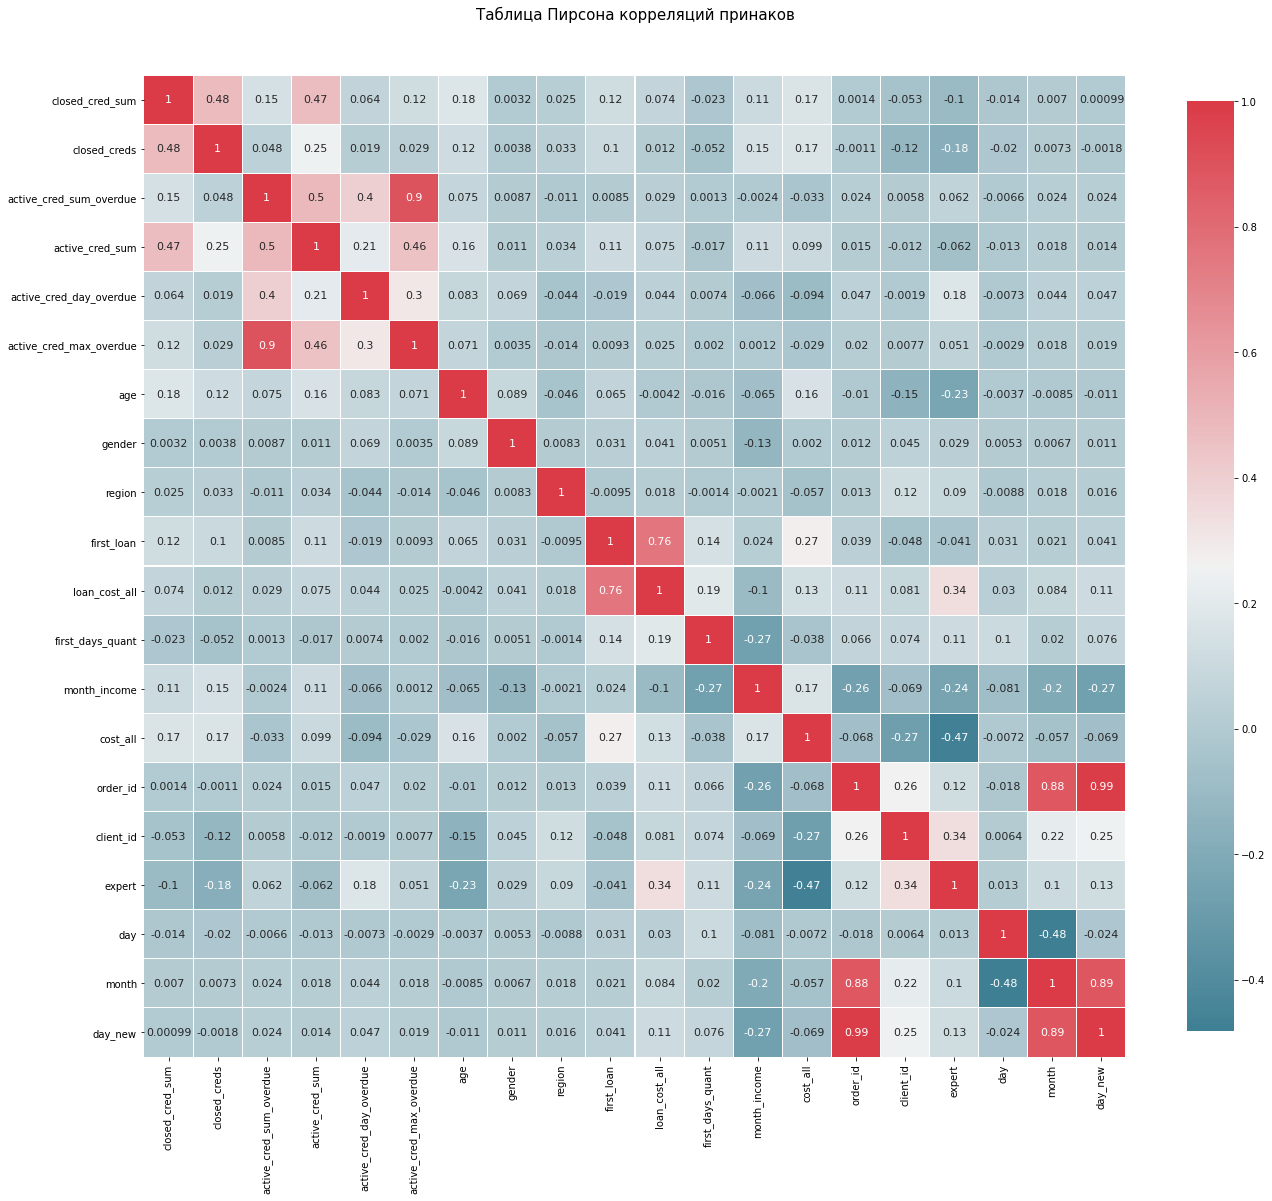

In [244]:
import seaborn as sns

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(22, 19))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':11 }
    )
    
    plt.title('Таблица Пирсона корреляций принаков', y=1.05, size=15)

correlation_heatmap(df)

Ниже я привел краткий обзор каждого признака в датасете. В случае обнаружения каких-либо зависимостей с целевой переменной я приводил отдельный комментарий по этому поводу. 

## Переменные, характеризующие кредитную историю клиента

### closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам

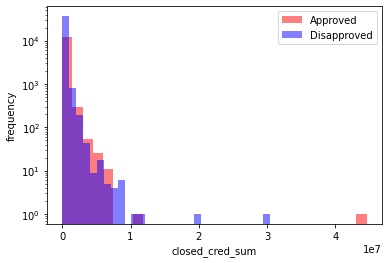

In [245]:
plot_histogram('closed_cred_sum', bins=30, log=True)

### closed_creds - количество закрытых кредитов

Видно, что с увеличением кол-ва закрытых кредитов увеличивается процент одобрения заявки

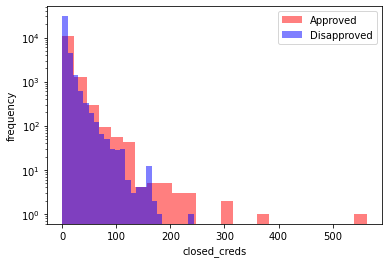

In [246]:
plot_histogram('closed_creds', bins=25, log=True)

### active_cred_sum_overdue - суммарная задолженность по активным кредитам

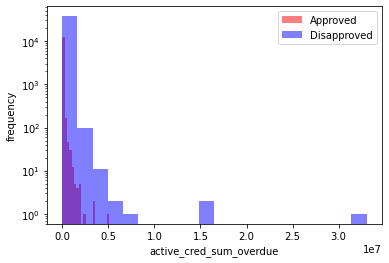

In [247]:
plot_histogram('active_cred_sum_overdue', bins=20, log=True)

### active_cred_sum - сумма всех активных кредитов

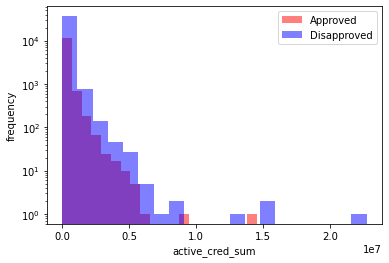

In [248]:
plot_histogram('active_cred_sum', bins=20, log=True)

### active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам

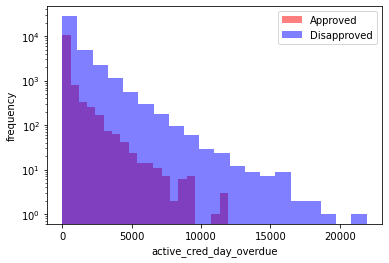

In [249]:
plot_histogram('active_cred_day_overdue', bins=20, log=True)

### active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам

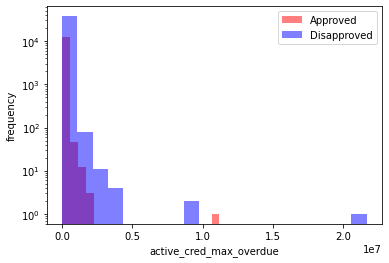

In [250]:
plot_histogram('active_cred_max_overdue', bins=20, log=True)

## Переменные характеризующие клиента

### gender - пол
Из диаграммы видно, что для обоих полов шансы на получение кредита оказывались почти одинаковыми. Данный признак мало влияет на модель.

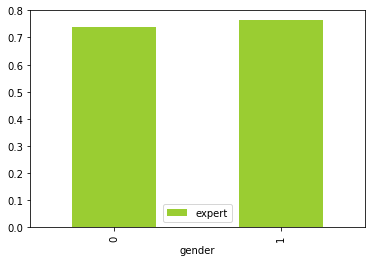

In [251]:
plot_pivot_table('gender')

### age - возраст
Можно заметить, что с увеличением возраста клиента повышаются шансы на успешное получение кредита. Очевидно, данный признак оказывает значительное влияние на модель.

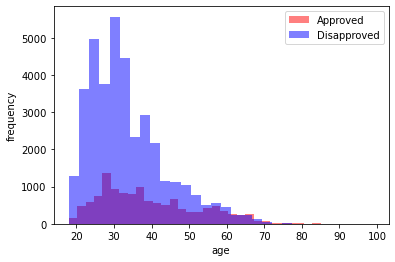

In [252]:
plot_histogram('age', bins=30)

### region - регион

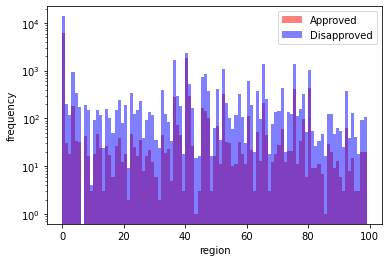

In [253]:
plot_histogram('region', bins=count_unique_values(df, 'region'), log=True)

### month_income - ежемесячный доход
В большинстве своем заметно, что чем больше доход человека, тем больше шансов у него на одобрение по кредиту.

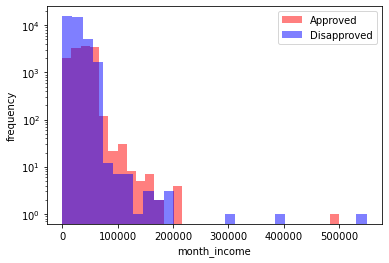

In [254]:
plot_histogram('month_income', bins=30, log=True)

## Переменные, характеризующие кредит, по которому нужно сделать прогноз

### first_loan - сумма, которую клиент хочет получить в кредит

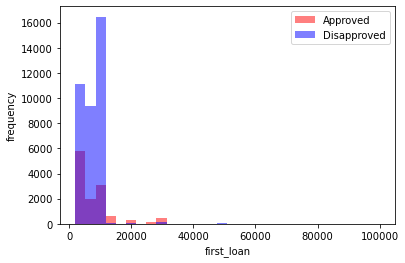

In [255]:
plot_histogram('first_loan', bins=30)

### first_days_quant - срок, на который клиент хочет взять кредит
Можно заметить, что при большом запрашиваемом сроке на кредит клиент скорее всего получит отказ

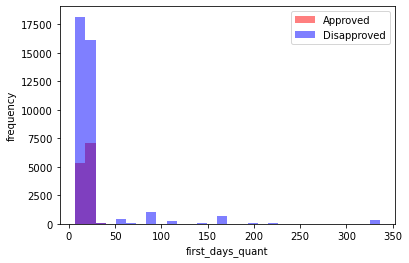

In [256]:
plot_histogram('first_days_quant', bins=30)

### loan_cost_all - одобренная клиенту сумма кредита
Как мне показалось, наличие и использование этого признака приведет к утечке информации (Data Leakage), так как целевой меткой является одобрение или отказ по кредиту, а данный признак приводит информацию об одобренной сумме, то есть предполагается, что клиент уже получил одобрение от банка. Таким образом, данный признак нужно убрать из дальнейшего рассмотрения, иначе его наличие в будущей модели может привести к проблеме переобучения.

### cost_all - сумма всех выплат по одобренному кредиту
Здесь ситуация абсолютна аналогична предыдущему признаку (Data Leakage): если выплата больше 0, то мы уже знаем, что кредит был одобрен.

### order_id - id заявки
Данный признак можно вовсе убрать из рассмотрения, так как его номера заявок не несут полезной информации по поводу клиента и по факту никак не должны влиять на решение по поводу одобрения заявки.

### client_id - id клиента
Здесь ситуация абсолютна аналогична предыдущему признаку: id клиента не может влиять на решение по кредиту.

### order_date - дата подачи заявки на получение кредита
На диаграмме с месяцами отчетливо видно, что клиенты, подававшие заявку в ранние месяцы имели меньший процент их отклонения. Вполне логично, что такая же тенденция сохраняется и с введенным выше признаком new_day.

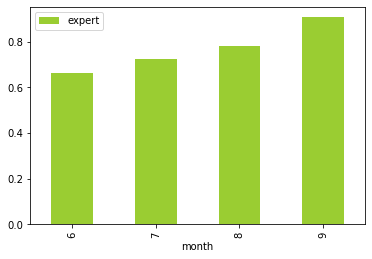

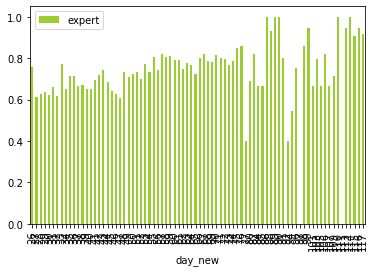

In [257]:
plot_pivot_table('month')
plot_pivot_table('day_new')

## Вывод
Анализ выше показал, что для построения модели следует убрать признаки loan_cost_all, cost_all, order_id, client_id и воспользоваться оставишимися. Если мы внимательно посмотрим на таблицу корреляции признаков выше, то заметим, что есть только одна пара из оставшихся признаков с большой корреляцией (active_cred_sum_overdue и active_cred_max_overdue), равной 0.9. В таком случае я считаю нужным убрать один из этих признаков, например, active_cred_sum_overdue. Также из двух признаков month и day_new надо оставить только один: пусть это будет month. Помимо этого, я не стал включать в модель номер региона, я это сделал по двум причинам: во-первых, на мой взгляд, из диаграммы выше он не является критичным для модели, и, во-вторых, номера регионов неупорядочены, то есть данный признак является категориальной переменной. Чтобы модель могла корректно его обрабатывать, необходимо его преобразовать как из категориального признака в несколько числовых. Однако если брать, к примеру, One-Hot преобразование, то будет сгенерировано приблизительно 100 новых признаков, что значительно усложнит сложность вычислений для модели.


Таким образом запишем признаки, которые мы будем использовать для моделирования:

In [277]:
columns = ['closed_cred_sum', 'closed_creds', 'active_cred_sum', 'age',
           'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
           'first_loan', 'first_days_quant', 'month_income', 'month']

# Моделирование и оценка качества модели

In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

Так как целевая метка может принимать только 2 дискретных значения (0 и 1), то данная задача относится к бинарной классификации. Именно поэтому я решил в качестве метрики качества выбрать accuracy (хотя, конечно, можно было взять и другую, например, f-score). Для более точной оценки я проводил кросс-валидацию по всему датасету с количеством фолдов, равным 10, а далее брал среднее значение accuracy для всех фолдов. Перебирая различные модели я остановился на градиентном бустинге (GradientBoostingClassifier), который показывал наиболее высокие результаты. Также для данной модели я пытался найти оптимальный шаг обучения (learning rate), чтобы еще улучшить модель.

В конечном итоге наилучший результат модель показала при шаге обучения, равном 0.75: при нем средняя точность предсказаний составляла 85%.

In [279]:
X = df[columns]
Y = df[target]

learning_rates = [0.2, 0.4, 0.6, 0.8, 1, 1.2]

for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=40, learning_rate=learning_rate,
                                       max_features=2, max_depth = 2, random_state = 0)
    accuracy_array = cross_val_score(model, X, Y, cv=10)
    accuracy = np.mean(accuracy_array)
    print("Learning rate:", learning_rate ,"\tAccuracy =", accuracy)

Learning rate: 0.2 	Accuracy = 0.8346405335488866
Learning rate: 0.4 	Accuracy = 0.8438438788197816
Learning rate: 0.6 	Accuracy = 0.8510866038753969
Learning rate: 0.8 	Accuracy = 0.8522871961347052
Learning rate: 1 	Accuracy = 0.8542080084684404
Learning rate: 1.2 	Accuracy = 0.8515470160858903
